In [1]:
import tomllib

import importlib
import nibabel as nib
import numpy as np
import os
import sys
from matplotlib import pyplot as plt
from monai.utils import set_determinism
from pathlib import Path
from pprint import pprint
from torch.utils.data import DataLoader

from src.utils import setup_dirs

sys.path.insert(0, "..")

In [2]:
root_dir = Path(os.getcwd()).parent
data_dir, log_dir, out_dir = setup_dirs(root_dir)
data_dir = data_dir / "ACDC" / "database"

with open(root_dir / "config.toml", "rb") as file:
    config = tomllib.load(file)

pprint(config)
set_determinism(seed=config["hyperparameters"]["seed"])
spatial_dims = config["hyperparameters"]["spatial_dimensions"]

{'hyperparameters': {'augment': True,
                     'batch_size': 8,
                     'epochs': 150,
                     'learning_rate': 1e-06,
                     'percentage_data': 1.0,
                     'seed': 42,
                     'spatial_dimensions': 2,
                     'validation_split': 0.8}}


In [3]:


importlib.reload(sys.modules["src.transforms"])
importlib.reload(sys.modules["src.datasets.acdc_dataset"])
from src.transforms.transforms import get_transforms
from src.datasets.acdc_dataset import ACDCDataset

train_transforms, val_transforms = get_transforms(spatial_dims=spatial_dims, percentage_slices=1.0)
train_transform_no_aug, _ = get_transforms(spatial_dims=spatial_dims, percentage_slices=1.0, augment=False)
train_data = ACDCDataset(data_dir=data_dir / "training", transform=train_transforms)
train_data_no_aug = ACDCDataset(data_dir=data_dir / "training", transform=train_transform_no_aug)

check_dataloader = DataLoader(train_data, batch_size=8, shuffle=False)
check_dataloader_no_aug = DataLoader(train_data_no_aug, batch_size=8, shuffle=False)

print(len(check_dataloader.dataset))

100


In [7]:
# for data in check_dataloader:
#     ed = data['end_diastole']
#     print(ed.shape)

data = next(iter(check_dataloader))
# for key, image in data.items():
#     data[key] = image.permute(0, 1, 3, 4, 2)
image, label = data["image"], data["label"]
print(image.shape)
# image = image.permute(0, 1, 3, 4, 2)
# print(image.shape)

torch.Size([8, 1, 16, 224, 224])


In [5]:
for batch in check_dataloader:
    print(batch["image"].shape)
    print(batch["label"].shape)

torch.Size([8, 1, 16, 224, 224])
torch.Size([8, 1, 16, 224, 224])
torch.Size([8, 1, 16, 224, 224])
torch.Size([8, 1, 16, 224, 224])
torch.Size([8, 1, 16, 224, 224])
torch.Size([8, 1, 16, 224, 224])
torch.Size([8, 1, 16, 224, 224])
torch.Size([8, 1, 16, 224, 224])
torch.Size([8, 1, 16, 224, 224])
torch.Size([8, 1, 16, 224, 224])
torch.Size([8, 1, 16, 224, 224])
torch.Size([8, 1, 16, 224, 224])
torch.Size([8, 1, 16, 224, 224])
torch.Size([8, 1, 16, 224, 224])
torch.Size([8, 1, 16, 224, 224])
torch.Size([8, 1, 16, 224, 224])


[E thread_pool.cpp:109] Exception in thread pool task: mutex lock failed: Invalid argument
[E thread_pool.cpp:109] Exception in thread pool task: mutex lock failed: Invalid argument


KeyboardInterrupt: 

done


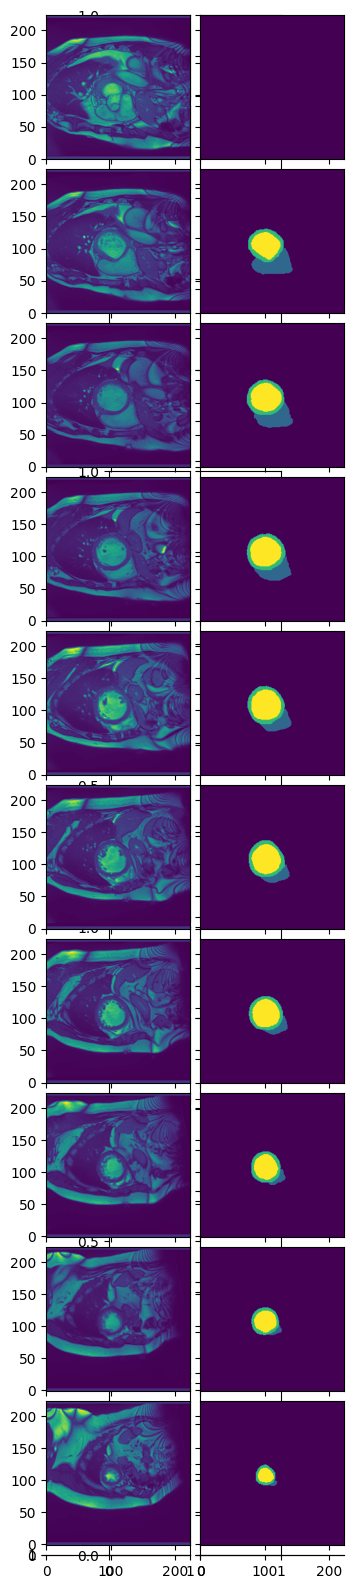

In [12]:
from mpl_toolkits.axes_grid1 import ImageGrid

check_data = next(iter(check_dataloader))
check_data_no_aug = next(iter(check_dataloader_no_aug))

image, label = check_data["image"][0][0], check_data["label"][0][0]
image_no_aug, label_no_aug = (
    check_data_no_aug["image"][0][0],
    check_data_no_aug["label"][0][0],
)

total_slices = image.shape[0]
slices = total_slices
fig = plt.figure(figsize=(20, 20))
grid = ImageGrid(fig, 111, nrows_ncols=(slices + 1, 2), axes_pad=0.1)

images = []
total_images = 0
for i in range(total_slices):
    if np.count_nonzero(image_no_aug[i, ...]) > 0:
        images.append(image_no_aug[i, ...])
        images.append(label_no_aug[i, ...])
        total_images += 1

# while total_images < slices or i < total_slices:
#     # images.append(image_no_aug[i, ...])
#     # images.append(label_no_aug[i, ...])
#     # images.append(image[(10 + i) % total_slices, ...])
#     # images.append(label[(10 + i) % total_slices, ...])
#     if np.count_nonzero(image[i, ...]) > 0:
#         images.append(image[i, ...])
#         images.append(label[i, ...])
#         print(total_images)
#         total_images += 1
#     i += 1
#
grid = ImageGrid(fig, 111, nrows_ncols=(total_images + 1, 2), axes_pad=0.1)
for ax, image in zip(grid, images):
    ax.imshow(image, origin="lower")

print("done")

# plt.show()
plt.savefig("slices.png", bbox_inches="tight")

In [ ]:
data = next(iter(check_dataloader))
image, label = data["end_diastole"], data["end_diastole_label"]
print(image.shape, label.shape)

In [99]:
patient = "patient001"
patient_dir = data_dir / "training" / patient

full_image = nib.load(patient_dir / f"{patient}_4d.nii.gz")
print(full_image)

In [ ]:
print(full_image.header.get_zooms())
print(full_image.header.get_xyzt_units())

In [ ]:
end_diastole = nib.load(patient_dir / f"{patient}_frame01.nii.gz")
end_diastole = end_diastole.get_fdata(dtype=np.float32)

print(end_diastole.shape)
print(end_diastole[0].shape)
print(end_diastole[:, :, 0].shape)

In [ ]:
width = end_diastole.shape[0]
height = end_diastole.shape[1]
slices = end_diastole.shape[2]

fig, axs = plt.subplots(3, 4, figsize=[10, 10])
for idx in range(slices):
    axs.flat[idx].imshow(end_diastole[:, :, idx], cmap="gray")
    axs.flat[idx].axis("off")

plt.tight_layout()
plt.show()

In [ ]:
# I want to check that the frames that are separately being loaded are the same as within the 4D image
full_4d_volume = full_image.get_fdata(dtype=np.float32)
first_frame = full_4d_volume[:, :, :, 0]
assert np.allclose(first_frame, end_diastole)

# Note that despite being named frame01 it is actually frame00 - the literal first time frame, zero indexed